<a href="https://colab.research.google.com/github/anujsaxena/AIML/blob/main/AIML_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Clustering
Clustering is the process of splitting a population or set of data points into many groups so that data points in the same group are more similar than data points in other groups. To put it another way, the goal is to separate groups with similar characteristics and assign them to clusters.

Example: Suppose we want to understand the purchasing habits of the consumers. We csn divide them into groups. Lets say 10 groups. Consumers having similar purchases will be grouped in a perticular group and the rest in another and so on. We can say most likely in one group. 

# **Types of Clustering**
Broadly speaking, clustering can be divided into two subgroups :

*Hard Clustering:* In hard clustering, each data point either belongs to a cluster completely or not. For example, in the above example each customer is put into one group out of the 10 groups.

*Soft Clustering:* In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, from the above scenario each costumer is assigned a probability to be in either of 10 clusters of the retail store.

# **Types of clustering algorithms**
Since the task of clustering is subjective, the means that can be used for achieving this goal are plenty. Every methodology follows a different set of rules for defining the ‘similarity’ among data points. In fact, there are more than 100 clustering algorithms known. But few of the algorithms are used popularly, let’s look at them in detail:

*Connectivity models:* As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.

*Centroid models:* These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

*Distribution models:* These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

*Density Models:* These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.


# **Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)**

https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html


We have some data, and we want to cluster it. How exactly do we do that, and what do the results look like? If you are very familiar with sklearn and its API, particularly for clustering, then you can probably skip this tutorial – hdbscan implements exactly this API, so you can use it just as you would any other sklearn clustering algorithm. If, on the other hand, you aren’t that familiar with sklearn, fear not, and read on. Let’s start with the simplest case first – we have data in a nice tidy dataframe format.

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd

data, labels = make_blobs(n_samples=2000, n_features=10)
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-8.258426,-5.794748,8.596592,6.107575,-1.235629,6.488807,-1.105745,8.375102,-5.124156,-3.810390
1,-9.996487,-5.357501,6.723361,6.647284,-1.834359,5.662304,0.352865,7.790472,-5.528208,-3.344113
2,6.446012,-2.746073,-7.958818,4.939559,6.719734,-0.440726,-8.789638,-4.831348,-5.365949,-1.567019
3,-0.767520,1.845965,-9.329593,2.147575,6.258907,-6.803996,-7.639162,-2.906374,-4.236257,-5.188860
4,-1.702166,2.482854,-6.640039,2.479929,10.460525,-7.562902,-9.141536,-2.799367,-3.841828,-5.127117


In [3]:
print(labels)

[0 0 2 ... 2 1 2]


In [5]:
!pip install hdbscan

     |████████████████████████████████| 5.2 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330873 sha256=afbb16fe6575a5365732a8705ea6a1a58918112dc1d70dcee028913da53bb04c
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [7]:
import hdbscan
cluster = hdbscan.HDBSCAN()  # create object
cluster.fit(df)



HDBSCAN()

In [8]:
cluster.labels_

array([0, 0, 1, ..., 1, 2, 1])

We have a total of three clusters, with labels 0, 1, and 2. Importantly HDBSCAN is noise aware – it has a notion of data samples that are not assigned to any cluster. This is handled by assigning these samples the label -1. But wait, there’s more. The hdbscan library implements soft clustering, where each data point is assigned a cluster membership score ranging from 0.0 to 1.0. A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score) while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core). You can access these scores via the probabilities_ attribute.

In [9]:
cluster.labels_.max()

2

In [10]:
cluster.probabilities_

array([0.74460223, 0.78600239, 0.95867952, ..., 0.79057017, 0.72128762,
       0.84040243])

In [13]:
clusterer = hdbscan.HDBSCAN(metric='manhattan')
clusterer.fit(df)

HDBSCAN(metric='manhattan')

In [14]:
clusterer.labels_

array([0, 0, 1, ..., 1, 2, 1])

In [15]:
hdbscan.dist_metrics.METRIC_MAPPING

{'arccos': hdbscan.dist_metrics.ArccosDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'cosine': hdbscan.dist_metrics.ArccosDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'haversine': hdbscan.dist_metrics.HaversineDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dis

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

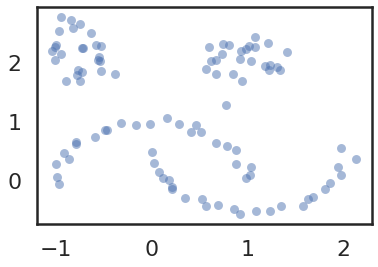

In [21]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [22]:
test_data

array([[-0.31754735,  0.98747561],
       [-0.16042457,  0.95500785],
       [ 1.03261653,  0.22950746],
       [ 1.62806256, -0.31478121],
       [ 0.28181063,  0.95631146],
       [ 1.68359274, -0.27858632],
       [ 0.0252296 ,  0.30673176],
       [-0.01631804,  0.96216892],
       [-0.98229955,  0.06794374],
       [ 0.16112889,  1.07015367],
       [ 1.97110876,  0.56329877],
       [ 0.12244403,  0.04182609],
       [ 0.85430059, -0.47215662],
       [-0.58827129,  0.74213903],
       [ 0.40741782,  0.82153102],
       [ 1.23861083, -0.51358522],
       [ 0.78654984,  0.58799006],
       [ 0.9163511 , -0.57077654],
       [ 0.87853864,  0.52284511],
       [ 0.21619297, -0.10714599],
       [-0.863512  ,  0.36803187],
       [ 1.80960222, -0.13463931],
       [ 1.34348207, -0.42852472],
       [-0.78149888,  0.6551012 ],
       [ 1.02805705,  0.08966354],
       [ 1.85548068, -0.03372457],
       [-0.46597981,  0.8689738 ],
       [ 0.21008417, -0.13735738],
       [-0.99086587,

In [23]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

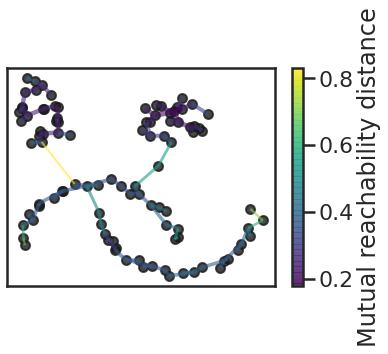

In [24]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

# **Cluster hierarchy **

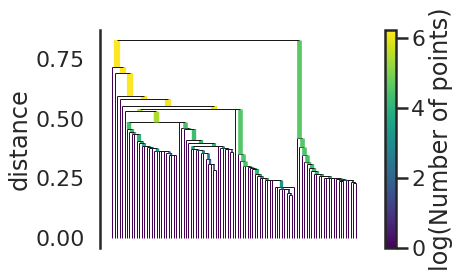

In [25]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

# **Condense the cluster tree**

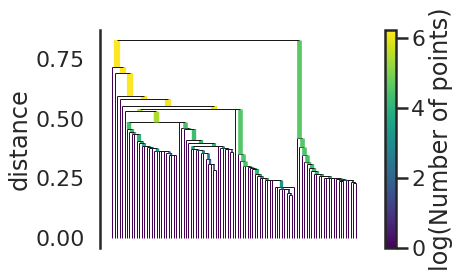

In [26]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

# **Extract Clusters**

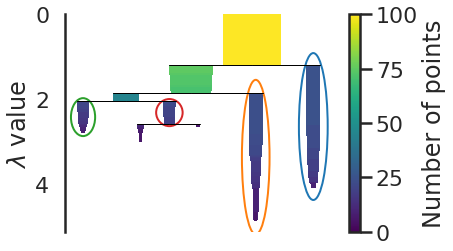

In [27]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

We have the clusters it is a simple enough matter to turn that into cluster labelling as per the sklearn API. Any point not in a selected cluster is simply a noise point (and assigned the label -1). We can do a little more though: for each cluster we have the \lambda_p for each point p in that cluster; If we simply normalize those values (so they range from zero to one) then we have a measure of the strength of cluster membership for each point in the cluster. The hdbscan library returns this as a probabilities_ attribute of the clusterer object. Thus, with labels and membership strengths in hand we can make the standard plot, choosing a color for points based on cluster label, and desaturating that color according the strength of membership (and make unclustered points pure gray).

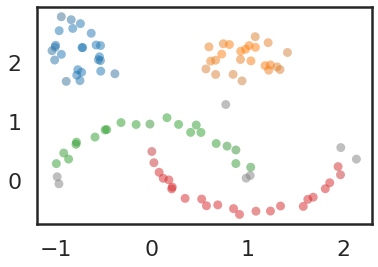

In [28]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)